# Latent Semantic Indexing

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from transformers import MarianMTModel, MarianTokenizer

# Example queries in English
queries = [
    'What is the capital of France?',
    'Who wrote the Harry Potter series?',
    'How tall is the Eiffel Tower?',
    'What is the largest country in the world by area?',
    'Who is the current President of the United States?',
    'What is the population of Japan?',
    'What is the highest mountain in Africa?',
    'Who is the founder of Amazon?',
    'What is the currency of Brazil?',
    'What is the most spoken language in the world?',
    'What is the highest grossing movie of all time?',
    'Who discovered electricity?',
    'What is the largest ocean in the world?',
    'Who is the lead singer of the band Queen?',
    'What is the capital of Australia?',
    'What is the longest river in the world?',
    'What is the most populated city in the world?',
    'What is the speed of light?',
    'What is the largest animal on earth?',
    'Who invented the telephone?',
    'What is the currency of Japan?',
    'What is the boiling point of water?',
    'What is the smallest country in the world by area?',
    'Who is the CEO of Tesla?',
    'What is the tallest building in the world?',
    'What is the largest desert in the world?',
    'Who is the author of The Great Gatsby?',
    'What is the capital of Brazil?',
    'What is the currency of China?',
    'What is the most visited city in the world?',
    'What is the largest planet in the solar system?',
    'What is the chemical symbol for gold?',
    'Who directed the movie Titanic?',
    'What is the largest country in South America?',
    'Who is the current Prime Minister of Japan?',
    'What is the highest mountain in the world?',
    'What is the capital of Italy?',
    'What is the most common blood type?',
    'What is the capital of Spain?',
    'What is the largest city in the United States?',
    'What is the currency of Mexico?',
    'What is the highest waterfall in the world?',
    'Who is the lead actor in the movie Forrest Gump?',
    'What is the capital of Canada?',
    'What is the largest bird in the world?',
    'What is the tallest mammal in the world?',
    'Who is the author of "The Catcher in the Rye"?',
    'What is the currency of India?',
    'What is the smallest country in the world by population?',
    'What is the most popular sport in the world?',
    'What is the highest grossing book of all time?',
    'Who is the first person to walk on the moon?',
    'What is the largest lake in Africa?',
    'What is the largest river in South America?',
    'What is the largest glacier in the world?',
    'Who is the founder of Microsoft?',
    'What is the currency of South Africa?',
    'What is the largest island in the world?',
    'What is the fastest land animal in the world?',
    'Who is the author of "To Kill a Mockingbird"?',
    'What is the capital of Russia?',
    'What is the most visited theme park in the world?',
    'What is the highest grossing video game of all time?',
    'What is the currency of South Korea?',
    'What is the most populated country in Africa?',
    'What is the highest mountain in South America?',
    'Who is the director of "The Godfather"?',
    'What is the capital of Egypt?',
    'What is the largest continent in the world?',
    'What is the chemical symbol for oxygen?',
    'What is the largest city in Europe?',
    'What is the highest grossing concert tour of all time?',
    'What is the largest volcano in the world?',
    'Who is the author of "1984"?',
    'What is the currency of Canada?',
    'What is the largest waterfall in North America?',
    'What is the highest mountain in North America?',
    'Who is the lead actress in the movie "Gone with the Wind"?',
    'What is the capital of Argentina?',
    'What is the largest country in Africa by area?',
    'What is the highest grossing Broadway show of all time?',
    'What is the most populated country in Europe?',
    'What is the smallest bone in the human body?',
    'Who painted the Mona Lisa?',
    'What is the largest organ in the human body?',
    'What is the only continent with no active volcanoes?',
    'Who discovered penicillin?',
    'What is the deepest point in the ocean?',
    'What is the largest city in Australia?',
    'Who composed the music for the film Jaws?',
    'What is the fastest fish in the ocean?',
    'What is the largest animal ever to exist on Earth?',
    'Who wrote the novel "Moby Dick"?',
    'What is the capital of Turkey?',
    'What is the smallest planet in our solar system?',
    'Who is the creator of the television series The Simpsons?',
    'What is the smallest country in North America by area?',
    'What is the tallest tree in the world?',
    'What is the national animal of Canada?',
    'What is the largest freshwater lake in the world?',
    'What is the largest canyon in the world?',
    'Who discovered the New World?',
    'What is the largest city in Canada?',
    'What is the highest mountain in Europe?',
    'Who is the author of "The Lord of the Rings" trilogy?',
    'What is the largest moon in our solar system?',
    'What is the capital of Saudi Arabia?',
    'What is the largest cave system in the world?',
    'Who invented the printing press?',
    'What is the currency of Australia?',
    'What is the oldest continuously inhabited city in the world?',
    'What is the largest glacier in Europe?',
    'Who is the author of "Pride and Prejudice"?',
    'What is the capital of China?',
    'What is the smallest country in Asia by area?',
    'What is the highest waterfall in Europe?',
    'Who is the creator of the comic book character Batman?',
    'What is the currency of Egypt?',
    'What is the largest sea on Earth?',
    'What is the longest railway in the world?',
    'Who was the first female prime minister of the United Kingdom?',
    'What is the capital of South Korea?',
    'What is the smallest bird in the world?',
    'Who is the author of "The Adventures of Huckleberry Finn"?',
    'What is the highest mountain in Australia?',
    'What is the largest canyon in North America?',
    'What is the currency of Russia?',
    'What is the largest coral reef system in the world?',
    'Who was the first African American to become president of the United States?',
    'What is the capital of Peru?'
]

# Example documents in Spanish and English
docs = [
    'La capital de Francia es París.',
    'Harry Potter es una serie de novelas fantásticas escritas por J.K. Rowling.',
    'La Torre Eiffel mide 324 metros de altura.',
    'Rusia es el país más grande del mundo por superficie.',
    'Joe Biden es actualmente el presidente de los Estados Unidos.',
    'La población de Japón es de alrededor de 126 millones de personas.',
    'El Monte Kilimanjaro es la montaña más alta de África.',
    'Jeff Bezos es el fundador de Amazon.',
    'La moneda de Brasil es el real.',
    'El mandarín es el idioma más hablado en el mundo.',
    'Avengers: Endgame es la película más taquillera de todos los tiempos.',
    'Benjamin Franklin descubrió la electricidad.',
    'El océano Pacífico es el más grande del mundo.',
    'Freddie Mercury fue el cantante principal del grupo Queen.',
    'La capital de Australia es Canberra.',
    'El Nilo es el río más largo del mundo.',
    'Tokio es la ciudad más poblada del mundo.',
    'La velocidad de la luz es de alrededor de 299 792 458 metros por segundo.',
    'La ballena azul es el animal más grande del mundo.',
    'Alexander Graham Bell inventó el teléfono.',
    'La moneda de Japón es el yen.',
    'El punto de ebullición del agua es de 100 grados Celsius.',
    'El Vaticano es el país más pequeño del mundo por superficie.',
    'Elon Musk es el CEO de Tesla.',
    'El Burj Khalifa es el edificio más alto del mundo.',
    'El Sahara es el desierto más grande del mundo.',
    'F. Scott Fitzgerald es el autor de El gran Gatsby.',
    'La capital de Brasil es Brasilia.',
    'La moneda de China es el yuan.',
    'Bangkok es la ciudad más visitada del mundo.',
    'Júpiter es el planeta más grande del sistema solar.',
    'Au es el símbolo químico del oro.',
    'James Cameron dirigió la película Titanic.',
    'Brasil es el país más grande de América del Sur.',
    'Yoshihide Suga es actualmente el Primer Ministro de Japón.',
    'El Everest es la montaña más alta del mundo.',
    'La capital de Italia es Roma.',
    'El grupo sanguíneo más común es el grupo O.',
    'La capital de España es Madrid.',
    'Nueva York es la ciudad más grande de los Estados Unidos.',
    'La moneda de México es el peso mexicano.',
    'La catarata más alta del mundo es el Salto Ángel en Venezuela.',
    'Tom Hanks es el actor principal en la película Forrest Gump.',
    'La capital de Canadá es Ottawa.',
    'El avestruz es el ave más grande del mundo.',
    'La jirafa es el mamífero más alto del mundo.',
    'J.D. Salinger es el autor de "El guardián entre el centeno".',
    'La moneda de la India es la rupia.',
    'El Vaticano es el país más pequeño del mundo en términos de población.',
    'El fútbol es el deporte más popular del mundo.',
    'La Biblia es el libro más vendido de todos los tiempos.',
    'Neil Armstrong fue la primera persona en caminar sobre la luna.',
    'El lago Victoria es el lago más grande de África.',
    'El río Amazonas es el río más grande de Sudamérica.',
    'El glaciar Lambert es el glaciar más grande del mundo.',
    'Bill Gates es el fundador de Microsoft.',
    'La moneda de Sudáfrica es el rand.',
    'Groenlandia es la isla más grande del mundo.',
    'El guepardo es el animal terrestre más rápido del mundo.',
    'Harper Lee es la autora de "Matar a un ruiseñor".',
    'La capital de Rusia es Moscú.',
    'El parque temático más visitado del mundo es Magic Kingdom en Walt Disney World en Florida.',
    'Minecraft es el videojuego más vendido de todos los tiempos.',
    'La moneda de Corea del Sur es el won.',
    'Nigeria es el país más poblado de África.',
    'El Aconcagua es la montaña más alta de Sudamérica.',
    'Francis Ford Coppola es el director de "El Padrino".',
    'La capital de Egipto es El Cairo.',
    'Asia es el continente más grande del mundo.',
    'El símbolo químico del oxígeno es "O".',
    'Moscú es la ciudad más grande de Europa.',
    'La gira de conciertos más exitosa de todos los tiempos es la gira "U2 360°".',
    'El Mauna Loa es el volcán más grande del mundo.',
    'George Orwell es el autor de "1984".',
    'La moneda de Canadá es el dólar canadiense.',
    'Las Cataratas del Niagara son las cataratas más grandes de América del Norte.',
    'El Monte Denali (anteriormente conocido como Monte McKinley) es la montaña más alta de América del Norte.',
    'Vivien Leigh es la actriz principal en la película "Lo que el viento se llevó".',
    'La capital de Argentina es Buenos Aires.',
    'Argelia es el país más grande de África.',
    'El Rey León es el espectáculo de Broadway más taquillero de todos los tiempos.',
    'Rusia es el país más poblado de Europa.',
    'El hueso más pequeño del cuerpo humano es el estribo, ubicado en el oído medio.',
    'La Mona Lisa fue pintada por Leonardo da Vinci.',
    'El órgano más grande del cuerpo humano es la piel.',
    'La Antártida es el único continente sin volcanes activos.',
    'Alexander Fleming descubrió la penicilina.',
    'El punto más profundo del océano es la Fosa de las Marianas.',
    'Sídney es la ciudad más grande de Australia.',
    'John Williams compuso la música para la película Jaws.',
    'El pez más rápido del océano es el marlín azul.',
    'El animal más grande que haya existido en la Tierra es la ballena azul.',
    'Herman Melville escribió la novela "Moby Dick".',
    'La capital de Turquía es Ankara.',
    'El planeta más pequeño de nuestro sistema solar es Mercurio.',
    'Matt Groening es el creador de la serie de televisión Los Simpson.',
    'El país más pequeño de América del Norte por área es San Cristóbal y Nieves.',
    'El árbol más alto del mundo es una secuoya gigante llamada Hyperion.',
    'El animal nacional de Canadá es el castor.',
    'El lago de agua dulce más grande del mundo es el lago Superior.',
    'El cañón más grande del mundo es el Gran Cañón en Arizona, Estados Unidos.',
    'Cristóbal Colón descubrió el Nuevo Mundo.',
    'La ciudad más grande de Canadá es Toronto.',
    'El monte Elbrus es la montaña más alta de Europa.',
    'J.R.R. Tolkien es el autor de la trilogía "El Señor de los Anillos".',
    'La luna más grande de nuestro sistema solar es Ganímedes.',
    'La capital de Arabia Saudita es Riad.',
    'El sistema de cuevas más grande del mundo es el sistema de cuevas de Mammoth en Kentucky, Estados Unidos.',
    'Johannes Gutenberg inventó la imprenta.',
    'La moneda de Australia es el dólar australiano.',
    'La ciudad habitada continuamente más antigua del mundo es Damasco, en Siria.',
    'El glaciar más grande de Europa es el Vatnajökull en Islandia.',
    'Jane Austen es la autora de "Orgullo y Prejuicio".',
    'La capital de China es Pekín.',
    'El país más pequeño de Asia por área es Maldivas.',
    'La cascada más alta de Europa es el Salto Ángel en Venezuela.',
    'Bob Kane es el creador del personaje de cómic Batman.',
    'La moneda de Egipto es la libra egipcia.',
    'El mar más grande de la Tierra es el Océano Pacífico.',
    'El ferrocarril más largo del mundo es el Ferrocarril Transiberiano, que se extiende desde Moscú hasta Vladivostok.',
    'Margaret Thatcher fue la primera mujer primer ministro del Reino Unido.',
    'La capital de Corea del Sur es Seúl.',
    'El colibrí abeja es la especie de ave más pequeña del mundo.',
    'Mark Twain es el autor de "Las aventuras de Huckleberry Finn".',
    'La montaña más alta de Australia es el Monte Kosciuszko.',
    'El cañón más grande de América del Norte es el Gran Cañón.',
    'La moneda de Rusia es el Rublo.',
    'El sistema de arrecifes de coral más grande del mundo es la Gran Barrera de Coral.',
    'El primer afroamericano en convertirse en presidente de los Estados Unidos fue Barack Obama.',
    'La capital de Perú es Lima.'
]

# Vectorize the documents using the TfidfVectorizer
vectorizer = TfidfVectorizer()
english_vecs = vectorizer.fit_transform(queries)
spanish_vecs = vectorizer.fit_transform(docs)

# Compute the truncated SVD
svd = TruncatedSVD(n_components=2)
english_lsi = svd.fit_transform(english_vecs)
spanish_lsi = svd.fit_transform(spanish_vecs)

# Compute the cosine similarity between the documents
def cosine_sim(a, b):
    dot_product = np.dot(a, b)
    norm_a = np.linalg.norm(a)
    norm_b = np.linalg.norm(b)
    return dot_product / (norm_a * norm_b)

# Compute the Jaccard similarity between the documents
def jaccard_sim(a, b):
    intersection = len(set(a).intersection(set(b)))
    union = len(set(a).union(set(b)))
    return intersection / union

# Compute the Dice similarity between the documents
def dice_sim(a, b):
    intersection = len(set(a).intersection(set(b)))
    total = len(a) + len(b)
    return (2 * intersection) / total

# Compute the overlap similarity between the documents
def overlap_sim(a, b):
    intersection = len(set(a).intersection(set(b)))
    min_len = min(len(a), len(b))
    return intersection / min_len

# Compute the similarity matrix between the English and Spanish documents using different similarity measures
sim_cosine = np.zeros((len(queries), len(docs)))
sim_jaccard = np.zeros((len(queries), len(docs)))
sim_dice = np.zeros((len(queries), len(docs)))
sim_overlap = np.zeros((len(queries), len(docs)))

for i in range(len(queries)):
    for j in range(len(docs)):
        sim_cosine[i][j] = cosine_sim(english_lsi[i], spanish_lsi[j])
        sim_jaccard[i][j] = jaccard_sim(english_vecs[i].toarray()[0], spanish_vecs[j].toarray()[0])
        sim_dice[i][j] = dice_sim(english_vecs[i].toarray()[0], spanish_vecs[j].toarray()[0])
        sim_overlap[i][j] = overlap_sim(english_vecs[i].toarray()[0], spanish_vecs[j].toarray()[0])

# Print the similarity matrices
print("Cosine similarity:\n", sim_cosine)
print("Jaccard similarity:\n", sim_jaccard)
print("Dice similarity:\n", sim_dice)
print("Overlap similarity:\n", sim_overlap)


Cosine similarity:

 [[0.98223398 0.91783403 0.99193029 ... 0.64090026 0.65938945 0.9822227 ]

 [0.88290785 0.99415102 0.91016097 ... 0.83912234 0.85210989 0.88287963]

 [0.63902125 0.96089375 0.68519991 ... 0.98268994 0.98690693 0.63897501]

 ...

 [0.0747116  0.62237079 0.1360114  ... 0.90808431 0.89762487 0.07465166]

 [0.95516192 0.95639519 0.97159006 ... 0.72254805 0.73915634 0.95514412]

 [0.98223388 0.91783425 0.99193022 ... 0.64090068 0.65938987 0.9822226 ]]

Jaccard similarity:

 [[0.08333333 0.08333333 0.09090909 ... 0.05263158 0.06666667 0.08333333]

 [0.1        0.1        0.11111111 ... 0.05882353 0.07692308 0.1       ]

 [0.11111111 0.11111111 0.125      ... 0.0625     0.08333333 0.11111111]

 ...

 [0.07142857 0.07142857 0.07692308 ... 0.04761905 0.05882353 0.07142857]

 [0.07692308 0.07692308 0.08333333 ... 0.05       0.0625     0.07692308]

 [0.08333333 0.08333333 0.09090909 ... 0.05263158 0.06666667 0.08333333]]

Dice similarity:

 [[0.00316456 0.00316456 0.00316456 .

In [ ]:
cosine_correct = 0
jaccard_correct = 0
dice_correct = 0
overlap_correct = 0

for i in range(len(queries)):
  cosine_max_index = np.argmax(sim_cosine[i])
  jaccard_max_index = np.argmax(sim_jaccard[i])
  dice_max_index = np.argmax(sim_dice[i])
  overlap_max_index = np.argmax(sim_overlap[i])
  if cosine_max_index == i:
    cosine_correct += 1
  if jaccard_max_index == i:
      jaccard_correct += 1
  if dice_max_index == i:
      dice_correct += 1
  if overlap_max_index == i:
      overlap_correct += 1

cosine_accuracy = cosine_correct / len(queries)
jaccard_accuracy = jaccard_correct / len(queries)
dice_accuracy = dice_correct / len(queries)
overlap_accuracy = overlap_correct / len(queries)

print(f"\nAccuracy for cosine similarity: {cosine_accuracy}")
print(f"Accuracy for Jaccard similarity: {jaccard_accuracy}")
print(f"Accuracy for Dice similarity: {dice_accuracy}")
print(f"Accuracy for overlap similarity: {overlap_accuracy}")



Accuracy for cosine similarity: 0.023076923076923078

Accuracy for Jaccard similarity: 0.007692307692307693

Accuracy for Dice similarity: 0.007692307692307693

Accuracy for overlap similarity: 0.007692307692307693


In [ ]:
avg_sim_sim = sim_cosine + sim_jaccard + sim_dice + sim_overlap
avg_sim_correct = 0
for i in range(len(queries)):
  avg_sim_max_index = np.argmax(avg_sim_sim[i])
  if avg_sim_max_index == i:
    avg_sim_correct += 1

avg_sim_accuracy = avg_sim_correct / len(queries)
print(f"\nAccuracy for Average Similarity: {avg_sim_accuracy}")



Accuracy for Average Similarity: 0.007692307692307693


# Translation

In [ ]:
!pip install googletrans

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/















In [ ]:
!pip install pygoogletranslation

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

















In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from transformers import MarianTokenizer, MarianMTModel

# Example queries in English
queries = [
    'What is the capital of France?',
    'Who wrote the Harry Potter series?',
    'How tall is the Eiffel Tower?',
    'What is the largest country in the world by area?',
    'Who is the current President of the United States?',
    'What is the population of Japan?',
    'What is the highest mountain in Africa?',
    'Who is the founder of Amazon?',
    'What is the currency of Brazil?',
    'What is the most spoken language in the world?',
    'What is the highest grossing movie of all time?',
    'Who discovered electricity?',
    'What is the largest ocean in the world?',
    'Who is the lead singer of the band Queen?',
    'What is the capital of Australia?',
    'What is the longest river in the world?',
    'What is the most populated city in the world?',
    'What is the speed of light?',
    'What is the largest animal on earth?',
    'Who invented the telephone?',
    'What is the currency of Japan?',
    'What is the boiling point of water?',
    'What is the smallest country in the world by area?',
    'Who is the CEO of Tesla?',
    'What is the tallest building in the world?',
    'What is the largest desert in the world?',
    'Who is the author of The Great Gatsby?',
    'What is the capital of Brazil?',
    'What is the currency of China?',
    'What is the most visited city in the world?',
    'What is the largest planet in the solar system?',
    'What is the chemical symbol for gold?',
    'Who directed the movie Titanic?',
    'What is the largest country in South America?',
    'Who is the current Prime Minister of Japan?',
    'What is the highest mountain in the world?',
    'What is the capital of Italy?',
    'What is the most common blood type?',
    'What is the capital of Spain?',
    'What is the largest city in the United States?',
    'What is the currency of Mexico?',
    'What is the highest waterfall in the world?',
    'Who is the lead actor in the movie Forrest Gump?',
    'What is the capital of Canada?',
    'What is the largest bird in the world?',
    'What is the tallest mammal in the world?',
    'Who is the author of "The Catcher in the Rye"?',
    'What is the currency of India?',
    'What is the smallest country in the world by population?',
    'What is the most popular sport in the world?',
    'What is the highest grossing book of all time?',
    'Who is the first person to walk on the moon?',
    'What is the largest lake in Africa?',
    'What is the largest river in South America?',
    'What is the largest glacier in the world?',
    'Who is the founder of Microsoft?',
    'What is the currency of South Africa?',
    'What is the largest island in the world?',
    'What is the fastest land animal in the world?',
    'Who is the author of "To Kill a Mockingbird"?',
    'What is the capital of Russia?',
    'What is the most visited theme park in the world?',
    'What is the highest grossing video game of all time?',
    'What is the currency of South Korea?',
    'What is the most populated country in Africa?',
    'What is the highest mountain in South America?',
    'Who is the director of "The Godfather"?',
    'What is the capital of Egypt?',
    'What is the largest continent in the world?',
    'What is the chemical symbol for oxygen?',
    'What is the largest city in Europe?',
    'What is the highest grossing concert tour of all time?',
    'What is the largest volcano in the world?',
    'Who is the author of "1984"?',
    'What is the currency of Canada?',
    'What is the largest waterfall in North America?',
    'What is the highest mountain in North America?',
    'Who is the lead actress in the movie "Gone with the Wind"?',
    'What is the capital of Argentina?',
    'What is the largest country in Africa by area?',
    'What is the highest grossing Broadway show of all time?',
    'What is the most populated country in Europe?',
    'What is the smallest bone in the human body?',
    'Who painted the Mona Lisa?',
    'What is the largest organ in the human body?',
    'What is the only continent with no active volcanoes?',
    'Who discovered penicillin?',
    'What is the deepest point in the ocean?',
    'What is the largest city in Australia?',
    'Who composed the music for the film Jaws?',
    'What is the fastest fish in the ocean?',
    'What is the largest animal ever to exist on Earth?',
    'Who wrote the novel "Moby Dick"?',
    'What is the capital of Turkey?',
    'What is the smallest planet in our solar system?',
    'Who is the creator of the television series The Simpsons?',
    'What is the smallest country in North America by area?',
    'What is the tallest tree in the world?',
    'What is the national animal of Canada?',
    'What is the largest freshwater lake in the world?',
    'What is the largest canyon in the world?',
    'Who discovered the New World?',
    'What is the largest city in Canada?',
    'What is the highest mountain in Europe?',
    'Who is the author of "The Lord of the Rings" trilogy?',
    'What is the largest moon in our solar system?',
    'What is the capital of Saudi Arabia?',
    'What is the largest cave system in the world?',
    'Who invented the printing press?',
    'What is the currency of Australia?',
    'What is the oldest continuously inhabited city in the world?',
    'What is the largest glacier in Europe?',
    'Who is the author of "Pride and Prejudice"?',
    'What is the capital of China?',
    'What is the smallest country in Asia by area?',
    'What is the highest waterfall in Europe?',
    'Who is the creator of the comic book character Batman?',
    'What is the currency of Egypt?',
    'What is the largest sea on Earth?',
    'What is the longest railway in the world?',
    'Who was the first female prime minister of the United Kingdom?',
    'What is the capital of South Korea?',
    'What is the smallest bird in the world?',
    'Who is the author of "The Adventures of Huckleberry Finn"?',
    'What is the highest mountain in Australia?',
    'What is the largest canyon in North America?',
    'What is the currency of Russia?',
    'What is the largest coral reef system in the world?',
    'Who was the first African American to become president of the United States?',
    'What is the capital of Peru?'
]

# Example documents in Spanish and English
docs = [
    'La capital de Francia es París.',
    'Harry Potter es una serie de novelas fantásticas escritas por J.K. Rowling.',
    'La Torre Eiffel mide 324 metros de altura.',
    'Rusia es el país más grande del mundo por superficie.',
    'Joe Biden es actualmente el presidente de los Estados Unidos.',
    'La población de Japón es de alrededor de 126 millones de personas.',
    'El Monte Kilimanjaro es la montaña más alta de África.',
    'Jeff Bezos es el fundador de Amazon.',
    'La moneda de Brasil es el real.',
    'El mandarín es el idioma más hablado en el mundo.',
    'Avengers: Endgame es la película más taquillera de todos los tiempos.',
    'Benjamin Franklin descubrió la electricidad.',
    'El océano Pacífico es el más grande del mundo.',
    'Freddie Mercury fue el cantante principal del grupo Queen.',
    'La capital de Australia es Canberra.',
    'El Nilo es el río más largo del mundo.',
    'Tokio es la ciudad más poblada del mundo.',
    'La velocidad de la luz es de alrededor de 299 792 458 metros por segundo.',
    'La ballena azul es el animal más grande del mundo.',
    'Alexander Graham Bell inventó el teléfono.',
    'La moneda de Japón es el yen.',
    'El punto de ebullición del agua es de 100 grados Celsius.',
    'El Vaticano es el país más pequeño del mundo por superficie.',
    'Elon Musk es el CEO de Tesla.',
    'El Burj Khalifa es el edificio más alto del mundo.',
    'El Sahara es el desierto más grande del mundo.',
    'F. Scott Fitzgerald es el autor de El gran Gatsby.',
    'La capital de Brasil es Brasilia.',
    'La moneda de China es el yuan.',
    'Bangkok es la ciudad más visitada del mundo.',
    'Júpiter es el planeta más grande del sistema solar.',
    'Au es el símbolo químico del oro.',
    'James Cameron dirigió la película Titanic.',
    'Brasil es el país más grande de América del Sur.',
    'Yoshihide Suga es actualmente el Primer Ministro de Japón.',
    'El Everest es la montaña más alta del mundo.',
    'La capital de Italia es Roma.',
    'El grupo sanguíneo más común es el grupo O.',
    'La capital de España es Madrid.',
    'Nueva York es la ciudad más grande de los Estados Unidos.',
    'La moneda de México es el peso mexicano.',
    'La catarata más alta del mundo es el Salto Ángel en Venezuela.',
    'Tom Hanks es el actor principal en la película Forrest Gump.',
    'La capital de Canadá es Ottawa.',
    'El avestruz es el ave más grande del mundo.',
    'La jirafa es el mamífero más alto del mundo.',
    'J.D. Salinger es el autor de "El guardián entre el centeno".',
    'La moneda de la India es la rupia.',
    'El Vaticano es el país más pequeño del mundo en términos de población.',
    'El fútbol es el deporte más popular del mundo.',
    'La Biblia es el libro más vendido de todos los tiempos.',
    'Neil Armstrong fue la primera persona en caminar sobre la luna.',
    'El lago Victoria es el lago más grande de África.',
    'El río Amazonas es el río más grande de Sudamérica.',
    'El glaciar Lambert es el glaciar más grande del mundo.',
    'Bill Gates es el fundador de Microsoft.',
    'La moneda de Sudáfrica es el rand.',
    'Groenlandia es la isla más grande del mundo.',
    'El guepardo es el animal terrestre más rápido del mundo.',
    'Harper Lee es la autora de "Matar a un ruiseñor".',
    'La capital de Rusia es Moscú.',
    'El parque temático más visitado del mundo es Magic Kingdom en Walt Disney World en Florida.',
    'Minecraft es el videojuego más vendido de todos los tiempos.',
    'La moneda de Corea del Sur es el won.',
    'Nigeria es el país más poblado de África.',
    'El Aconcagua es la montaña más alta de Sudamérica.',
    'Francis Ford Coppola es el director de "El Padrino".',
    'La capital de Egipto es El Cairo.',
    'Asia es el continente más grande del mundo.',
    'El símbolo químico del oxígeno es "O".',
    'Moscú es la ciudad más grande de Europa.',
    'La gira de conciertos más exitosa de todos los tiempos es la gira "U2 360°".',
    'El Mauna Loa es el volcán más grande del mundo.',
    'George Orwell es el autor de "1984".',
    'La moneda de Canadá es el dólar canadiense.',
    'Las Cataratas del Niagara son las cataratas más grandes de América del Norte.',
    'El Monte Denali (anteriormente conocido como Monte McKinley) es la montaña más alta de América del Norte.',
    'Vivien Leigh es la actriz principal en la película "Lo que el viento se llevó".',
    'La capital de Argentina es Buenos Aires.',
    'Argelia es el país más grande de África.',
    'El Rey León es el espectáculo de Broadway más taquillero de todos los tiempos.',
    'Rusia es el país más poblado de Europa.',
    'El hueso más pequeño del cuerpo humano es el estribo, ubicado en el oído medio.',
    'La Mona Lisa fue pintada por Leonardo da Vinci.',
    'El órgano más grande del cuerpo humano es la piel.',
    'La Antártida es el único continente sin volcanes activos.',
    'Alexander Fleming descubrió la penicilina.',
    'El punto más profundo del océano es la Fosa de las Marianas.',
    'Sídney es la ciudad más grande de Australia.',
    'John Williams compuso la música para la película Jaws.',
    'El pez más rápido del océano es el marlín azul.',
    'El animal más grande que haya existido en la Tierra es la ballena azul.',
    'Herman Melville escribió la novela "Moby Dick".',
    'La capital de Turquía es Ankara.',
    'El planeta más pequeño de nuestro sistema solar es Mercurio.',
    'Matt Groening es el creador de la serie de televisión Los Simpson.',
    'El país más pequeño de América del Norte por área es San Cristóbal y Nieves.',
    'El árbol más alto del mundo es una secuoya gigante llamada Hyperion.',
    'El animal nacional de Canadá es el castor.',
    'El lago de agua dulce más grande del mundo es el lago Superior.',
    'El cañón más grande del mundo es el Gran Cañón en Arizona, Estados Unidos.',
    'Cristóbal Colón descubrió el Nuevo Mundo.',
    'La ciudad más grande de Canadá es Toronto.',
    'El monte Elbrus es la montaña más alta de Europa.',
    'J.R.R. Tolkien es el autor de la trilogía "El Señor de los Anillos".',
    'La luna más grande de nuestro sistema solar es Ganímedes.',
    'La capital de Arabia Saudita es Riad.',
    'El sistema de cuevas más grande del mundo es el sistema de cuevas de Mammoth en Kentucky, Estados Unidos.',
    'Johannes Gutenberg inventó la imprenta.',
    'La moneda de Australia es el dólar australiano.',
    'La ciudad habitada continuamente más antigua del mundo es Damasco, en Siria.',
    'El glaciar más grande de Europa es el Vatnajökull en Islandia.',
    'Jane Austen es la autora de "Orgullo y Prejuicio".',
    'La capital de China es Pekín.',
    'El país más pequeño de Asia por área es Maldivas.',
    'La cascada más alta de Europa es el Salto Ángel en Venezuela.',
    'Bob Kane es el creador del personaje de cómic Batman.',
    'La moneda de Egipto es la libra egipcia.',
    'El mar más grande de la Tierra es el Océano Pacífico.',
    'El ferrocarril más largo del mundo es el Ferrocarril Transiberiano, que se extiende desde Moscú hasta Vladivostok.',
    'Margaret Thatcher fue la primera mujer primer ministro del Reino Unido.',
    'La capital de Corea del Sur es Seúl.',
    'El colibrí abeja es la especie de ave más pequeña del mundo.',
    'Mark Twain es el autor de "Las aventuras de Huckleberry Finn".',
    'La montaña más alta de Australia es el Monte Kosciuszko.',
    'El cañón más grande de América del Norte es el Gran Cañón.',
    'La moneda de Rusia es el Rublo.',
    'El sistema de arrecifes de coral más grande del mundo es la Gran Barrera de Coral.',
    'El primer afroamericano en convertirse en presidente de los Estados Unidos fue Barack Obama.',
    'La capital de Perú es Lima.'
]

# Define the language model and tokenizer for translation
model_name = 'Helsinki-NLP/opus-mt-en-es'
tokenizer = MarianTokenizer.from_pretrained(model_name)
model = MarianMTModel.from_pretrained(model_name)

# Tranrfdslate the queries to Spanish
spanish_queries = []
for query in queries:
    input_ids = tokenizer.encode(query, return_tensors='pt')
    translated = model.generate(input_ids=input_ids, num_beams=4, max_length=100, early_stopping=True)
    translated_query = tokenizer.decode(translated[0], skip_special_tokens=True)
    spanish_queries.append(translated_query)

# Vectorize the documents using the TfidfVectorizer
vectorizer = TfidfVectorizer()
tran_vecs = vectorizer.fit_transform(spanish_queries)
spanish_vecs = vectorizer.fit_transform(docs)

# Compute the truncated SVD
svd = TruncatedSVD(n_components=2)
english_lsi = svd.fit_transform(tran_vecs)
spanish_lsi = svd.fit_transform(spanish_vecs)

# Compute the cosine similarity between the documents
def cosine_sim(a, b):
    dot_product = np.dot(a, b)
    norm_a = np.linalg.norm(a)
    norm_b = np.linalg.norm(b)
    return dot_product / (norm_a * norm_b)

# Compute the Jaccard similarity between the documents
def jaccard_sim(a, b):
    intersection = len(set(a).intersection(set(b)))
    union = len(set(a).union(set(b)))
    return intersection / union

# Compute the Dice similarity between the documents
def dice_sim(a, b):
    intersection = len(set(a).intersection(set(b)))
    total = len(a) + len(b)
    return (2 * intersection) / total

# Compute the overlap similarity between the documents
def overlap_sim(a, b):
    intersection = len(set(a).intersection(set(b)))
    min_len = min(len(a), len(b))
    return intersection / min_len

# Compute the similarity matrix between the English and Spanish documents using different similarity measures
sim_cosine = np.zeros((len(queries), len(docs)))
sim_jaccard = np.zeros((len(queries), len(docs)))
sim_dice = np.zeros((len(queries), len(docs)))
sim_overlap = np.zeros((len(queries), len(docs)))

for i in range(len(queries)):
    for j in range(len(docs)):
        sim_cosine[i][j] = cosine_sim(english_lsi[i], spanish_lsi[j])
        sim_jaccard[i][j] = jaccard_sim(set(spanish_vecs[j].nonzero()[1]), set(tran_vecs[i].nonzero()[1]))
        sim_dice[i][j] = dice_sim(set(spanish_vecs[j].nonzero()[1]), set(tran_vecs[i].nonzero()[1]))
        sim_overlap[i][j] = overlap_sim(set(spanish_vecs[j].nonzero()[1]), set(tran_vecs[i].nonzero()[1]))

# Print the similarity matrices
print("Cosine similarity:\n", sim_cosine)
print("Jaccard similarity:\n", sim_jaccard)
print("Dice similarity:\n", sim_dice)
print("Overlap similarity:\n", sim_overlap)


/usr/local/lib/python3.9/dist-packages/transformers/models/marian/tokenization_marian.py:194: UserWarning: Recommended: pip install sacremoses.

  warnings.warn("Recommended: pip install sacremoses.")


Cosine similarity:

 [[0.98294671 0.91311261 0.9924348  ... 0.63819053 0.65368544 0.98294242]

 [0.9928116  0.88471698 0.99831177 ... 0.58686197 0.60317546 0.9928088 ]

 [0.9995293  0.83962621 0.99951406 ... 0.51232162 0.52964719 0.99952858]

 ...

 [0.18571304 0.71153652 0.24610266 ... 0.94910792 0.94251977 0.18569009]

 [0.71282773 0.98517772 0.75482127 ... 0.95928987 0.96482465 0.71281135]

 [0.88224151 0.99343019 0.90965884 ... 0.84006152 0.85089951 0.88223051]]

Jaccard similarity:

 [[0.         0.         0.         ... 0.         0.05555556 0.        ]

 [0.         0.         0.         ... 0.         0.11111111 0.        ]

 [0.         0.         0.         ... 0.05555556 0.         0.        ]

 ...

 [0.         0.         0.         ... 0.04347826 0.04347826 0.        ]

 [0.         0.         0.         ... 0.         0.04166667 0.        ]

 [0.         0.         0.         ... 0.05555556 0.         0.        ]]

Dice similarity:

 [[0.         0.         0.         .

In [ ]:
cosine_correct = 0
jaccard_correct = 0
dice_correct = 0
overlap_correct = 0

for i in range(len(queries)):
  cosine_max_index = np.argmax(sim_cosine[i])
  jaccard_max_index = np.argmax(sim_jaccard[i])
  dice_max_index = np.argmax(sim_dice[i])
  overlap_max_index = np.argmax(sim_overlap[i])
  if cosine_max_index == i:
    cosine_correct += 1
  if jaccard_max_index == i:
      jaccard_correct += 1
  if dice_max_index == i:
      dice_correct += 1
  if overlap_max_index == i:
      overlap_correct += 1

cosine_accuracy = cosine_correct / len(queries)
jaccard_accuracy = jaccard_correct / len(queries)
dice_accuracy = dice_correct / len(queries)
overlap_accuracy = overlap_correct / len(queries)

print(f"\nAccuracy for cosine similarity: {cosine_accuracy}")
print(f"Accuracy for Jaccard similarity: {jaccard_accuracy}")
print(f"Accuracy for Dice similarity: {dice_accuracy}")
print(f"Accuracy for overlap similarity: {overlap_accuracy}")



Accuracy for cosine similarity: 0.023076923076923078

Accuracy for Jaccard similarity: 0.0

Accuracy for Dice similarity: 0.0

Accuracy for overlap similarity: 0.007692307692307693


In [ ]:
avg_sim_sim = sim_cosine + sim_jaccard + sim_dice + sim_overlap
avg_sim_correct = 0
for i in range(len(queries)):
  avg_sim_max_index = np.argmax(avg_sim_sim[i])
  if avg_sim_max_index == i:
    avg_sim_correct += 1

avg_sim_accuracy = avg_sim_correct / len(queries)
print(f"\nAccuracy for Average Similarity: {avg_sim_accuracy}")



Accuracy for Average Similarity: 0.007692307692307693


# BERT

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

















In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch
import torch.nn.functional as F
import numpy as np

# Load the multilingual BERT model and tokenizer
model = AutoModel.from_pretrained('bert-base-multilingual-cased')
tokenizer = AutoTokenizer.from_pretrained('bert-base-multilingual-cased')

# Example queries in English
queries = [
    'What is the capital of France?',
    'Who wrote the Harry Potter series?',
    'How tall is the Eiffel Tower?',
    'What is the largest country in the world by area?',
    'Who is the current President of the United States?',
    'What is the population of Japan?',
    'What is the highest mountain in Africa?',
    'Who is the founder of Amazon?',
    'What is the currency of Brazil?',
    'What is the most spoken language in the world?',
    'What is the highest grossing movie of all time?',
    'Who discovered electricity?',
    'What is the largest ocean in the world?',
    'Who is the lead singer of the band Queen?',
    'What is the capital of Australia?',
    'What is the longest river in the world?',
    'What is the most populated city in the world?',
    'What is the speed of light?',
    'What is the largest animal on earth?',
    'Who invented the telephone?',
    'What is the currency of Japan?',
    'What is the boiling point of water?',
    'What is the smallest country in the world by area?',
    'Who is the CEO of Tesla?',
    'What is the tallest building in the world?',
    'What is the largest desert in the world?',
    'Who is the author of The Great Gatsby?',
    'What is the capital of Brazil?',
    'What is the currency of China?',
    'What is the most visited city in the world?',
    'What is the largest planet in the solar system?',
    'What is the chemical symbol for gold?',
    'Who directed the movie Titanic?',
    'What is the largest country in South America?',
    'Who is the current Prime Minister of Japan?',
    'What is the highest mountain in the world?',
    'What is the capital of Italy?',
    'What is the most common blood type?',
    'What is the capital of Spain?',
    'What is the largest city in the United States?',
    'What is the currency of Mexico?',
    'What is the highest waterfall in the world?',
    'Who is the lead actor in the movie Forrest Gump?',
    'What is the capital of Canada?',
    'What is the largest bird in the world?',
    'What is the tallest mammal in the world?',
    'Who is the author of "The Catcher in the Rye"?',
    'What is the currency of India?',
    'What is the smallest country in the world by population?',
    'What is the most popular sport in the world?',
    'What is the highest grossing book of all time?',
    'Who is the first person to walk on the moon?',
    'What is the largest lake in Africa?',
    'What is the largest river in South America?',
    'What is the largest glacier in the world?',
    'Who is the founder of Microsoft?',
    'What is the currency of South Africa?',
    'What is the largest island in the world?',
    'What is the fastest land animal in the world?',
    'Who is the author of "To Kill a Mockingbird"?',
    'What is the capital of Russia?',
    'What is the most visited theme park in the world?',
    'What is the highest grossing video game of all time?',
    'What is the currency of South Korea?',
    'What is the most populated country in Africa?',
    'What is the highest mountain in South America?',
    'Who is the director of "The Godfather"?',
    'What is the capital of Egypt?',
    'What is the largest continent in the world?',
    'What is the chemical symbol for oxygen?',
    'What is the largest city in Europe?',
    'What is the highest grossing concert tour of all time?',
    'What is the largest volcano in the world?',
    'Who is the author of "1984"?',
    'What is the currency of Canada?',
    'What is the largest waterfall in North America?',
    'What is the highest mountain in North America?',
    'Who is the lead actress in the movie "Gone with the Wind"?',
    'What is the capital of Argentina?',
    'What is the largest country in Africa by area?',
    'What is the highest grossing Broadway show of all time?',
    'What is the most populated country in Europe?',
    'What is the smallest bone in the human body?',
    'Who painted the Mona Lisa?',
    'What is the largest organ in the human body?',
    'What is the only continent with no active volcanoes?',
    'Who discovered penicillin?',
    'What is the deepest point in the ocean?',
    'What is the largest city in Australia?',
    'Who composed the music for the film Jaws?',
    'What is the fastest fish in the ocean?',
    'What is the largest animal ever to exist on Earth?',
    'Who wrote the novel "Moby Dick"?',
    'What is the capital of Turkey?',
    'What is the smallest planet in our solar system?',
    'Who is the creator of the television series The Simpsons?',
    'What is the smallest country in North America by area?',
    'What is the tallest tree in the world?',
    'What is the national animal of Canada?',
    'What is the largest freshwater lake in the world?',
    'What is the largest canyon in the world?',
    'Who discovered the New World?',
    'What is the largest city in Canada?',
    'What is the highest mountain in Europe?',
    'Who is the author of "The Lord of the Rings" trilogy?',
    'What is the largest moon in our solar system?',
    'What is the capital of Saudi Arabia?',
    'What is the largest cave system in the world?',
    'Who invented the printing press?',
    'What is the currency of Australia?',
    'What is the oldest continuously inhabited city in the world?',
    'What is the largest glacier in Europe?',
    'Who is the author of "Pride and Prejudice"?',
    'What is the capital of China?',
    'What is the smallest country in Asia by area?',
    'What is the highest waterfall in Europe?',
    'Who is the creator of the comic book character Batman?',
    'What is the currency of Egypt?',
    'What is the largest sea on Earth?',
    'What is the longest railway in the world?',
    'Who was the first female prime minister of the United Kingdom?',
    'What is the capital of South Korea?',
    'What is the smallest bird in the world?',
    'Who is the author of "The Adventures of Huckleberry Finn"?',
    'What is the highest mountain in Australia?',
    'What is the largest canyon in North America?',
    'What is the currency of Russia?',
    'What is the largest coral reef system in the world?',
    'Who was the first African American to become president of the United States?',
    'What is the capital of Peru?'
]

# Example documents in Spanish and English
docs = [
    'La capital de Francia es París.',
    'Harry Potter es una serie de novelas fantásticas escritas por J.K. Rowling.',
    'La Torre Eiffel mide 324 metros de altura.',
    'Rusia es el país más grande del mundo por superficie.',
    'Joe Biden es actualmente el presidente de los Estados Unidos.',
    'La población de Japón es de alrededor de 126 millones de personas.',
    'El Monte Kilimanjaro es la montaña más alta de África.',
    'Jeff Bezos es el fundador de Amazon.',
    'La moneda de Brasil es el real.',
    'El mandarín es el idioma más hablado en el mundo.',
    'Avengers: Endgame es la película más taquillera de todos los tiempos.',
    'Benjamin Franklin descubrió la electricidad.',
    'El océano Pacífico es el más grande del mundo.',
    'Freddie Mercury fue el cantante principal del grupo Queen.',
    'La capital de Australia es Canberra.',
    'El Nilo es el río más largo del mundo.',
    'Tokio es la ciudad más poblada del mundo.',
    'La velocidad de la luz es de alrededor de 299 792 458 metros por segundo.',
    'La ballena azul es el animal más grande del mundo.',
    'Alexander Graham Bell inventó el teléfono.',
    'La moneda de Japón es el yen.',
    'El punto de ebullición del agua es de 100 grados Celsius.',
    'El Vaticano es el país más pequeño del mundo por superficie.',
    'Elon Musk es el CEO de Tesla.',
    'El Burj Khalifa es el edificio más alto del mundo.',
    'El Sahara es el desierto más grande del mundo.',
    'F. Scott Fitzgerald es el autor de El gran Gatsby.',
    'La capital de Brasil es Brasilia.',
    'La moneda de China es el yuan.',
    'Bangkok es la ciudad más visitada del mundo.',
    'Júpiter es el planeta más grande del sistema solar.',
    'Au es el símbolo químico del oro.',
    'James Cameron dirigió la película Titanic.',
    'Brasil es el país más grande de América del Sur.',
    'Yoshihide Suga es actualmente el Primer Ministro de Japón.',
    'El Everest es la montaña más alta del mundo.',
    'La capital de Italia es Roma.',
    'El grupo sanguíneo más común es el grupo O.',
    'La capital de España es Madrid.',
    'Nueva York es la ciudad más grande de los Estados Unidos.',
    'La moneda de México es el peso mexicano.',
    'La catarata más alta del mundo es el Salto Ángel en Venezuela.',
    'Tom Hanks es el actor principal en la película Forrest Gump.',
    'La capital de Canadá es Ottawa.',
    'El avestruz es el ave más grande del mundo.',
    'La jirafa es el mamífero más alto del mundo.',
    'J.D. Salinger es el autor de "El guardián entre el centeno".',
    'La moneda de la India es la rupia.',
    'El Vaticano es el país más pequeño del mundo en términos de población.',
    'El fútbol es el deporte más popular del mundo.',
    'La Biblia es el libro más vendido de todos los tiempos.',
    'Neil Armstrong fue la primera persona en caminar sobre la luna.',
    'El lago Victoria es el lago más grande de África.',
    'El río Amazonas es el río más grande de Sudamérica.',
    'El glaciar Lambert es el glaciar más grande del mundo.',
    'Bill Gates es el fundador de Microsoft.',
    'La moneda de Sudáfrica es el rand.',
    'Groenlandia es la isla más grande del mundo.',
    'El guepardo es el animal terrestre más rápido del mundo.',
    'Harper Lee es la autora de "Matar a un ruiseñor".',
    'La capital de Rusia es Moscú.',
    'El parque temático más visitado del mundo es Magic Kingdom en Walt Disney World en Florida.',
    'Minecraft es el videojuego más vendido de todos los tiempos.',
    'La moneda de Corea del Sur es el won.',
    'Nigeria es el país más poblado de África.',
    'El Aconcagua es la montaña más alta de Sudamérica.',
    'Francis Ford Coppola es el director de "El Padrino".',
    'La capital de Egipto es El Cairo.',
    'Asia es el continente más grande del mundo.',
    'El símbolo químico del oxígeno es "O".',
    'Moscú es la ciudad más grande de Europa.',
    'La gira de conciertos más exitosa de todos los tiempos es la gira "U2 360°".',
    'El Mauna Loa es el volcán más grande del mundo.',
    'George Orwell es el autor de "1984".',
    'La moneda de Canadá es el dólar canadiense.',
    'Las Cataratas del Niagara son las cataratas más grandes de América del Norte.',
    'El Monte Denali (anteriormente conocido como Monte McKinley) es la montaña más alta de América del Norte.',
    'Vivien Leigh es la actriz principal en la película "Lo que el viento se llevó".',
    'La capital de Argentina es Buenos Aires.',
    'Argelia es el país más grande de África.',
    'El Rey León es el espectáculo de Broadway más taquillero de todos los tiempos.',
    'Rusia es el país más poblado de Europa.',
    'El hueso más pequeño del cuerpo humano es el estribo, ubicado en el oído medio.',
    'La Mona Lisa fue pintada por Leonardo da Vinci.',
    'El órgano más grande del cuerpo humano es la piel.',
    'La Antártida es el único continente sin volcanes activos.',
    'Alexander Fleming descubrió la penicilina.',
    'El punto más profundo del océano es la Fosa de las Marianas.',
    'Sídney es la ciudad más grande de Australia.',
    'John Williams compuso la música para la película Jaws.',
    'El pez más rápido del océano es el marlín azul.',
    'El animal más grande que haya existido en la Tierra es la ballena azul.',
    'Herman Melville escribió la novela "Moby Dick".',
    'La capital de Turquía es Ankara.',
    'El planeta más pequeño de nuestro sistema solar es Mercurio.',
    'Matt Groening es el creador de la serie de televisión Los Simpson.',
    'El país más pequeño de América del Norte por área es San Cristóbal y Nieves.',
    'El árbol más alto del mundo es una secuoya gigante llamada Hyperion.',
    'El animal nacional de Canadá es el castor.',
    'El lago de agua dulce más grande del mundo es el lago Superior.',
    'El cañón más grande del mundo es el Gran Cañón en Arizona, Estados Unidos.',
    'Cristóbal Colón descubrió el Nuevo Mundo.',
    'La ciudad más grande de Canadá es Toronto.',
    'El monte Elbrus es la montaña más alta de Europa.',
    'J.R.R. Tolkien es el autor de la trilogía "El Señor de los Anillos".',
    'La luna más grande de nuestro sistema solar es Ganímedes.',
    'La capital de Arabia Saudita es Riad.',
    'El sistema de cuevas más grande del mundo es el sistema de cuevas de Mammoth en Kentucky, Estados Unidos.',
    'Johannes Gutenberg inventó la imprenta.',
    'La moneda de Australia es el dólar australiano.',
    'La ciudad habitada continuamente más antigua del mundo es Damasco, en Siria.',
    'El glaciar más grande de Europa es el Vatnajökull en Islandia.',
    'Jane Austen es la autora de "Orgullo y Prejuicio".',
    'La capital de China es Pekín.',
    'El país más pequeño de Asia por área es Maldivas.',
    'La cascada más alta de Europa es el Salto Ángel en Venezuela.',
    'Bob Kane es el creador del personaje de cómic Batman.',
    'La moneda de Egipto es la libra egipcia.',
    'El mar más grande de la Tierra es el Océano Pacífico.',
    'El ferrocarril más largo del mundo es el Ferrocarril Transiberiano, que se extiende desde Moscú hasta Vladivostok.',
    'Margaret Thatcher fue la primera mujer primer ministro del Reino Unido.',
    'La capital de Corea del Sur es Seúl.',
    'El colibrí abeja es la especie de ave más pequeña del mundo.',
    'Mark Twain es el autor de "Las aventuras de Huckleberry Finn".',
    'La montaña más alta de Australia es el Monte Kosciuszko.',
    'El cañón más grande de América del Norte es el Gran Cañón.',
    'La moneda de Rusia es el Rublo.',
    'El sistema de arrecifes de coral más grande del mundo es la Gran Barrera de Coral.',
    'El primer afroamericano en convertirse en presidente de los Estados Unidos fue Barack Obama.',
    'La capital de Perú es Lima.'
]


# Tokenize the queries and documents
query_tokenized = [tokenizer.encode(q, add_special_tokens=True, return_tensors='pt') for q in queries]
doc_tokenized = [tokenizer.encode(d, add_special_tokens=True, return_tensors='pt') for d in docs]

# Pass the tokenized queries and documents through the BERT model
with torch.no_grad():
    query_outputs = [model(q) for q in query_tokenized]
    doc_outputs = [model(d) for d in doc_tokenized]

# Get the last hidden states from the BERT model for the queries and documents
query_last_hidden_states = [output.last_hidden_state for output in query_outputs]
doc_last_hidden_states = [output.last_hidden_state for output in doc_outputs]

# Compute the cosine similarity matrix between the last hidden states of the queries and documents
cosine_similarity_matrix = np.zeros((len(queries), len(docs)))
for i in range(len(queries)):
    for j in range(len(docs)):
        cosine_similarity_matrix[i][j] = F.cosine_similarity(query_last_hidden_states[i].mean(dim=1), doc_last_hidden_states[j].mean(dim=1)).item()

# Print the cosine similarity matrix
print('\nCosine similarity matrix:')
print(cosine_similarity_matrix)

# Compute the Jaccard similarity matrix between the queries and documents
jaccard_similarity_matrix = np.zeros((len(queries), len(docs)))
for i in range(len(queries)):
    query_text = queries[i].lower().split()
    query_set = set(query_text)
    for j in range(len(docs)):
        doc_text = docs[j].lower().split()
        doc_set = set(doc_text)
        jaccard_similarity_matrix[i][j] = len(query_set.intersection(doc_set)) / len(query_set.union(doc_set))

# Print the Jaccard similarity matrix
print('\nJaccard similarity matrix:')
print(jaccard_similarity_matrix)

# Compute the Dice similarity matrix between the queries and documents
dice_similarity_matrix = np.zeros((len(queries), len(docs)))
for i in range(len(queries)):
    query_text = queries[i].lower().split()
    query_set = set(query_text)
    for j in range(len(docs)):
        doc_text = docs[j].lower().split()
        doc_set = set(doc_text)
        intersection = len(query_set.intersection(doc_set))
        dice_similarity_matrix[i][j] = (2.0 * intersection) / (len(query_set) + len(doc_set))

# Print the Dice similarity matrix
print('\nDice similarity matrix:')
print(dice_similarity_matrix)

# Compute the overlap similarity matrix between the queries and documents
overlap_similarity_matrix = np.zeros((len(queries), len(docs)))
for i in range(len(queries)):
    query_text = queries[i].lower().split()
    query_set = set(query_text)
    for j in range(len(docs)):
        doc_text = docs[j].lower().split()
        doc_set = set(doc_text)
        intersection = len(query_set.intersection(doc_set))
        overlap_similarity_matrix[i][j] = intersection / len(query_set)

# Print the overlap similarity matrix
print('\nOverlap similarity matrix:')
print(overlap_similarity_matrix)




Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias']

- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).

- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).




Cosine similarity matrix:

[[0.3924363  0.26011214 0.29610443 ... 0.30638087 0.26516572 0.41473329]

 [0.24630314 0.43902239 0.25358114 ... 0.34763226 0.27750462 0.26809293]

 [0.24232683 0.30093229 0.45920748 ... 0.36905754 0.2841484  0.34240687]

 ...

 [0.22133534 0.30920419 0.29462129 ... 0.58326155 0.32891339 0.28924856]

 [0.24259615 0.28630528 0.22617579 ... 0.34112647 0.63110524 0.32558358]

 [0.29622453 0.20421521 0.25831401 ... 0.2958141  0.29596871 0.50848126]]



Jaccard similarity matrix:

[[0.09090909 0.         0.         ... 0.         0.         0.09090909]

 [0.         0.125      0.         ... 0.         0.         0.        ]

 [0.         0.         0.07692308 ... 0.         0.         0.        ]

 ...

 [0.         0.         0.         ... 0.04545455 0.         0.        ]

 [0.         0.         0.         ... 0.         0.         0.        ]

 [0.09090909 0.         0.         ... 0.         0.         0.09090909]]



Dice similarity matrix:

[[0.16666667

In [ ]:
cosine_correct = 0
jaccard_correct = 0
dice_correct = 0
overlap_correct = 0

for i in range(len(queries)):
  cosine_max_index = np.argmax(cosine_similarity_matrix[i])
  jaccard_max_index = np.argmax(jaccard_similarity_matrix[i])
  dice_max_index = np.argmax(dice_similarity_matrix[i])
  overlap_max_index = np.argmax(overlap_similarity_matrix[i])
  if cosine_max_index == i:
    cosine_correct += 1
  if jaccard_max_index == i:
      jaccard_correct += 1
  if dice_max_index == i:
      dice_correct += 1
  if overlap_max_index == i:
      overlap_correct += 1

cosine_accuracy = cosine_correct / len(queries)
jaccard_accuracy = jaccard_correct / len(queries)
dice_accuracy = dice_correct / len(queries)
overlap_accuracy = overlap_correct / len(queries)

print(f"\nAccuracy for cosine similarity: {cosine_accuracy}")
print(f"Accuracy for Jaccard similarity: {jaccard_accuracy}")
print(f"Accuracy for Dice similarity: {dice_accuracy}")
print(f"Accuracy for overlap similarity: {overlap_accuracy}")



Accuracy for cosine similarity: 0.6076923076923076

Accuracy for Jaccard similarity: 0.11538461538461539

Accuracy for Dice similarity: 0.11538461538461539

Accuracy for overlap similarity: 0.11538461538461539


In [ ]:
avg_sim_metric = cosine_similarity_matrix + jaccard_similarity_matrix + dice_similarity_matrix + overlap_similarity_matrix

In [ ]:
avg_sim_correct = 0
for i in range(len(queries)):
  avg_sim_max_index = np.argmax(avg_sim_metric[i])
  if avg_sim_max_index == i:
    avg_sim_correct += 1

avg_sim_accuracy = avg_sim_correct / len(queries)
print(f"\nAccuracy for Average Similarity: {avg_sim_accuracy}")




Accuracy for Average Similarity: 0.6076923076923076


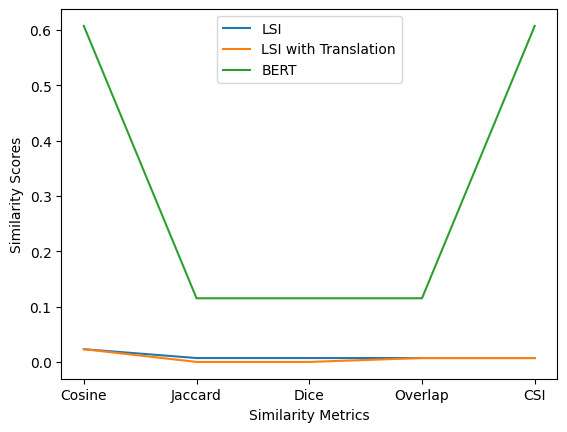

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the data
approaches = ['LSI', 'LSI with Translation', 'BERT']
metrics = ['Cosine', 'Jaccard', 'Dice', 'Overlap', 'CSI']
scores = np.array([[0.023, 0.007, 0.007, 0.007, 0.007],
                   [0.023, 0, 0, 0.007, 0.007],
                   [0.607, 0.115, 0.115, 0.115, 0.607]])

# Set up the plot
fig, ax = plt.subplots()

# Add the data to the plot
for i in range(len(approaches)):
    ax.plot(metrics, scores[i], label=approaches[i])

# Set the axis labels and legend
ax.set_xlabel('Similarity Metrics')
ax.set_ylabel('Similarity Scores')
ax.legend()

# Display the plot
plt.show()


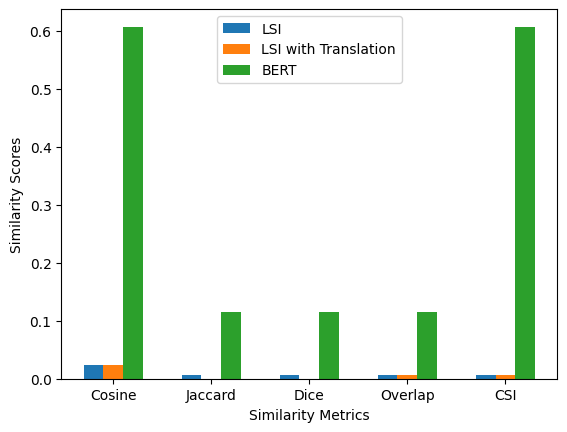

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the data
approaches = ['LSI', 'LSI with Translation', 'BERT']
metrics = ['Cosine', 'Jaccard', 'Dice', 'Overlap', 'CSI']
scores = np.array([[0.023, 0.007, 0.007, 0.007, 0.007],
                   [0.023, 0, 0, 0.007, 0.007],
                   [0.607, 0.115, 0.115, 0.115, 0.607]])

# Set up the plot
fig, ax = plt.subplots()

# Add the data to the plot
bar_width = 0.2
x_positions = np.arange(len(metrics))
for i in range(len(approaches)):
    ax.bar(x_positions + i*bar_width, scores[i], bar_width, label=approaches[i])

# Set the x-tick labels
ax.set_xticks(x_positions + bar_width)
ax.set_xticklabels(metrics)

# Set the axis labels and legend
ax.set_xlabel('Similarity Metrics')
ax.set_ylabel('Similarity Scores')
ax.legend()

# Display the plot
plt.show()

